In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

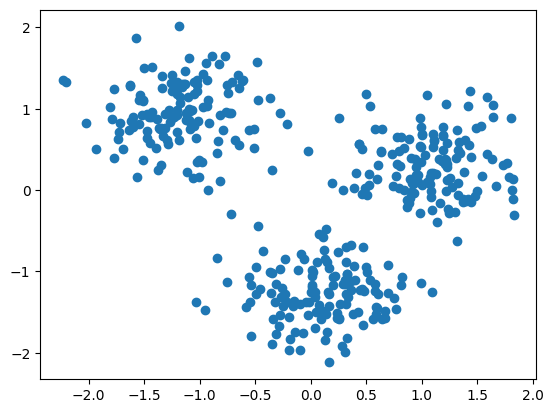

In [4]:
data = pd.read_csv('A2Q3.csv')
data = data.values
X = data[:,0]
Y = data[:,1]
# #normalizing the data
# X = (X - np.mean(X))/np.std(X)
# Y = (Y - np.mean(Y))/np.std(Y)
plt.scatter(X,Y)

In [6]:
class GMM():
    def __init__(self,X,K,iterations):
        self.X = X
        self.K = K
        self.iterations = iterations
        self.N = len(X)
        self.dim = X.shape[1]
        self.mu = np.random.uniform(low = np.min(X),high = np.max(X),size = (K,self.dim))
        self.pi = np.ones(K)/K
        self.sigma = np.random.uniform(low = np.min(X),high = np.max(X),size = (K,self.dim,self.dim))
        self.gamma = np.zeros((self.N,self.K))
        self.LLs = []
    
    def fit(self):
        for i in range(self.iterations):
            self.E_step()
            self.M_step()
            self.LLs.append(self.log_likelihood())
    
    def E_step(self):
        for i in range(self.N):
            for j in range(self.K):
                self.gamma[i,j] = self.pi[j]*self.gaussian(self.X[i],self.mu[j],self.sigma[j])
            self.gamma[i] /= np.sum(self.gamma[i])
    
    def M_step(self):
        for j in range(self.K):
            sum_gamma = np.sum(self.gamma[:,j])
            self.mu[j] = np.sum(self.gamma[:,j].dot(self.X))/sum_gamma
            self.pi[j] = sum_gamma/self.N
            self.sigma[j] = np.zeros((self.dim,self.dim))
            for i in range(self.N):
                self.sigma[j] += self.gamma[i,j]*np.outer(self.X[i]-self.mu[j],self.X[i]-self.mu[j])
            self.sigma[j] /= sum_gamma
    
    def log_likelihood(self):
        LL = 0
        for i in range(self.N):
            LL += np.log(np.sum(self.pi*self.gaussian(self.X[i],self.mu,self.sigma)))
        return LL
    
    def gaussian(self,x,mu,sigma):
        return np.exp(-0.5*(x-mu).T.dot(np.linalg.inv(sigma)).dot(x-mu))/np.sqrt(np.linalg.det(sigma))


In [8]:
GMM(data,2,100).fit()  

/tmp/ipykernel_14037/573980265.py:43: RuntimeWarning: invalid value encountered in sqrt
  return np.exp(-0.5*(x-mu).T.dot(np.linalg.inv(sigma)).dot(x-mu))/np.sqrt(np.linalg.det(sigma))
/home/aytien/.local/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
